In [6]:
from functools import partial, reduce
from itertools import *
import operator

from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

pd.set_option("display.max_rows", 10)

In [7]:
# stolen from https://github.com/data-8/datascience/blob/master/datascience/formats.py


def format_number(value, decimals=2, separator=','):
    if isinstance(value, (int, np.integer)):
        return ('{:' + separator + 'd}').format(value)
    else:
        return ('{:' + separator + '.' + str(decimals) + 'f}').format(value)

In [8]:
# ds # baby = Table.read_table('baby.csv')
baby = pd.read_csv('baby.csv')
baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [18]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [27]:
smoking_and_birthweight.groupby('Maternal Smoker').count()

,Birth Weight
Maternal Smoker,
False,715
True,459


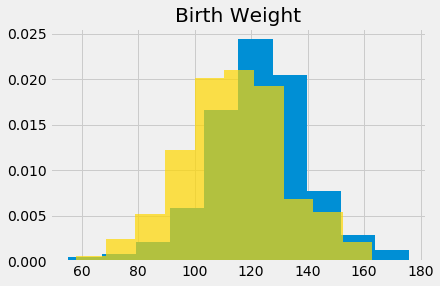

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = smoking_and_birthweight.loc[smoking_and_birthweight['Maternal Smoker'] == False].hist(
    'Birth Weight', ax=ax, density=True)
_ = smoking_and_birthweight.loc[smoking_and_birthweight['Maternal Smoker'] == True].hist(
    'Birth Weight', ax=ax, density=True, color="gold", alpha=0.7)

In [74]:
means_tbl = smoking_and_birthweight.groupby('Maternal Smoker')[['Birth Weight']].mean()
means_tbl

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [92]:
means = means_tbl['Birth Weight']
observed_difference = means[0] - means[1]
observed_difference

9.266142572024918

In [93]:
weights = smoking_and_birthweight['Birth Weight']
weights

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

In [101]:
shuffled_weights = weights.sample(replace=False, frac=1)
shuffled_weights

120

In [102]:
original_and_shuffled = smoking_and_birthweight.copy()
original_and_shuffled['Shuffled Birth Weight'] =  shuffled_weights.as_matrix()
original_and_shuffled

,Maternal Smoker,Birth Weight,Shuffled Birth Weight
0,False,120,71
1,False,113,117
2,True,128,144
3,True,108,161
4,False,136,83
...,...,...,...
1169,False,113,127
1170,False,128,144
1171,True,130,104
1172,False,125,129


In [103]:
original_and_shuffled.groupby('Maternal Smoker').mean()

,Birth Weight,Shuffled Birth Weight
Maternal Smoker,,
False,123.085315,119.916084
True,113.819172,118.755991


In [104]:
group_labels = baby['Maternal Smoker']
group_labels

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [108]:
# probably simpler with pandas to extract the array to use as index
label_index=group_labels.as_matrix()

In [ ]:
# array of shuffled weights

# table with shuffled weights assigned to group labels

# array of means of the two groups

# difference between means of the two groups

In [115]:
shuffled_weights = weights.sample(replace=False, frac=1).values
shuffled_tbl = pd.Series(shuffled_weights, index=label_index)
means = shuffled_tbl.groupby(lambda x: x).mean()
new_difference = means[False] - means[True]
new_difference

-0.2815393756570188

In [116]:
differences = np.empty(5000)

for i in np.arange(5000):
    shuffled_weights = weights.sample(replace=False, frac=1).values
    shuffled_tbl = pd.Series(shuffled_weights, index=label_index)
    means = shuffled_tbl.groupby(lambda x: x).mean()
    new_difference = means[False] - means[True]
    differences[i] = new_difference


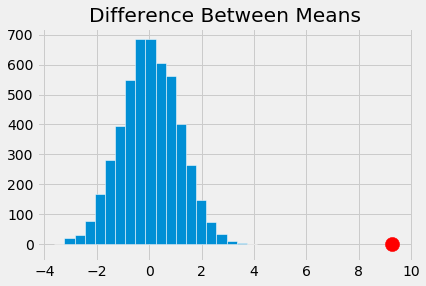

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
pd.DataFrame({"Difference Between Means": differences}).hist(bins=20, ec='w', ax=ax)
plt.scatter([observed_difference], [0], [200], 'red')

Deflagrate

In [129]:
football = pd.read_csv('deflategate.csv')
football

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
...,...,...,...
10,Patriots,10.90,11.35
11,Colts,12.70,12.35
12,Colts,12.75,12.30
13,Colts,12.50,12.95


In [130]:
# football = football.drop(1, 2).with_column(
#     'Combined', (football.column(1) + football.column(2)) / 2
# )
football["Combined"] = (football["Blakeman"] + football["Prioleau"]) / 2
football

,Team,Blakeman,Prioleau,Combined
0,Patriots,11.50,11.80,11.650
1,Patriots,10.85,11.20,11.025
2,Patriots,11.15,11.50,11.325
3,Patriots,10.70,11.00,10.850
4,Patriots,11.10,11.45,11.275
...,...,...,...,...
10,Patriots,10.90,11.35,11.125
11,Colts,12.70,12.35,12.525
12,Colts,12.75,12.30,12.525
13,Colts,12.50,12.95,12.725


In [131]:
start = pd.Series(12.5, index=range(0,11)).append(pd.Series(13, index=range(11,16)))
football["Drops"] = football["Combined"] - start
football

,Team,Blakeman,Prioleau,Combined,Drops
0,Patriots,11.50,11.80,11.650,-0.850
1,Patriots,10.85,11.20,11.025,-1.475
2,Patriots,11.15,11.50,11.325,-1.175
3,Patriots,10.70,11.00,10.850,-1.650
4,Patriots,11.10,11.45,11.275,-1.225
...,...,...,...,...,...
10,Patriots,10.90,11.35,11.125,-1.375
11,Colts,12.70,12.35,12.525,-0.475
12,Colts,12.75,12.30,12.525,-0.475
13,Colts,12.50,12.95,12.725,-0.275


In [154]:
drop_means = football[["Team","Drops"]].groupby("Team").mean()
drop_means


,Drops
Team,
Colts,-0.468750
Patriots,-1.202273


In [156]:
observed_difference = drop_means.values[1] - drop_means.values[0]
observed_difference

array([-0.73352273])

In [142]:
labels_index = football["Team"].values
labels_index

array(['Patriots', 'Patriots', 'Patriots', 'Patriots', 'Patriots',
       'Patriots', 'Patriots', 'Patriots', 'Patriots', 'Patriots',
       'Patriots', 'Colts', 'Colts', 'Colts', 'Colts'], dtype=object)

In [149]:
shuffled_drops = football["Drops"].sample(replace=False, frac=1).values
shuffled = pd.Series(shuffled_drops, index=labels_index)
means = shuffled.groupby(level=0).mean().values
new_difference = means[0] - means[1]


array([-0.96875   , -1.02045455])

In [150]:
differences = np.empty(20000)

for i in np.arange(20000):
    shuffled_drops = football["Drops"].sample(replace=False, frac=1).values
    shuffled = pd.Series(shuffled_drops, index=labels_index)
    means = shuffled.groupby(level=0).mean().values
    differences[i] = means[0] - means[1]
    
differences

array([ 0.19659091,  0.26477273, -0.36590909, ...,  0.04318182,
       -0.63011364, -0.20397727])

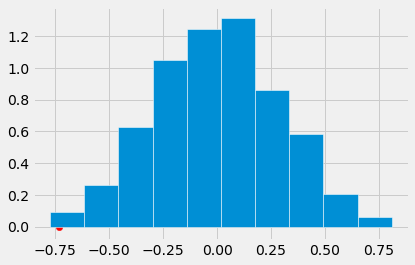

In [157]:
pd.Series(differences, name='Difference Between Means').hist(density=True, ec='w')
plt.scatter(observed_difference, 0, color='red', s=40)

In [163]:
p_value = np.count_nonzero(differences <= observed_difference) / 20000
print("p_value: {:.2}%".format(p_value*100))

p_value: 0.17%
